In [1]:
import pandas as pd
df=pd.read_csv("d:/learn/data/wine_new.csv") #csv 로딩
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3,0
1,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3,0
2,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3,0
3,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3,0
4,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3,0


In [2]:
df.columns #필드 목록

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [3]:
df.shape #데이터셋의 형태

(1599, 13)

In [4]:
df.describe() #기초 통계량

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.534709
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.498950
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,1.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,1.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [5]:
df.groupby("class").mean() #클래스별 평균값

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
class,,,,,,,,,,,,
0,8.142204,0.589503,0.237755,2.542070,0.092989,16.567204,54.645161,0.997068,3.311653,0.618535,9.926478,4.901882
1,8.474035,0.474146,0.299883,2.535965,0.082661,15.272515,39.352047,0.996467,3.310643,0.692620,10.855029,6.274854


In [6]:
df["class"].value_counts() #클래스별 샘플 갯수

1    855
0    744
Name: class, dtype: int64

In [7]:
train_cols=df.columns[0:11] #0~10 필드 선택
X=df[train_cols] #독립변수
y=df["class"] #종속변수

Text(0.5, 1.0, '분류\n(0:bad, 1:good)')

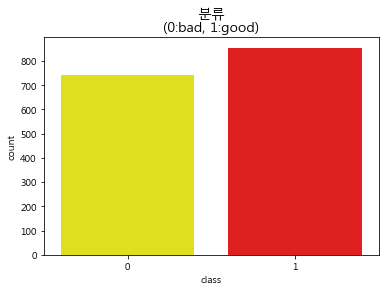

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/windows/fonts/malgun.ttf").get_name()
rc("font",family=font_name)
colors=["yellow","red"]
sns.countplot("class",data=df,palette=colors)
plt.title("분류\n(0:bad, 1:good)",fontsize=14)

C:\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C997198>,
      dtype=object)

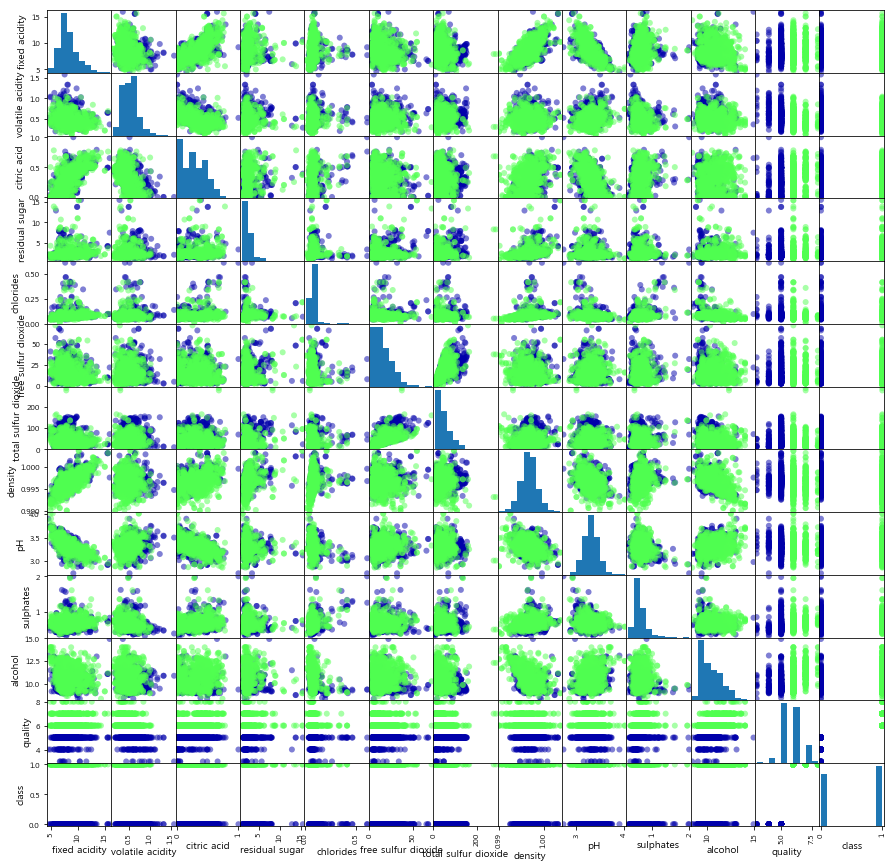

In [9]:
#산점도 행렬 출력
import mglearn
pd.plotting.scatter_matrix(df,c=y,figsize=(15,15),marker="o",
                          cmap=mglearn.cm3)

In [10]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample, columns=train_cols)
y_samp=pd.DataFrame(data=y_sample, columns=["class"])
df2=pd.concat([X_samp,y_samp],axis=1)

In [11]:
df2["class"].value_counts()

1    855
0    855
Name: class, dtype: int64

In [12]:
X=X_samp[train_cols]
y=y_samp["class"]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
    stratify=y,random_state=10)

[0.7397660818713451, 0.652046783625731, 0.6578947368421053, 0.631578947368421, 0.6403508771929824, 0.6228070175438597, 0.6491228070175439, 0.6198830409356725, 0.6549707602339181, 0.652046783625731]


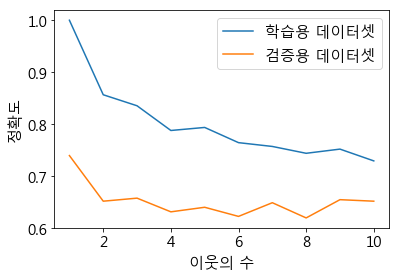

In [14]:
from sklearn.neighbors import KNeighborsClassifier

train_rate=[]
test_rate=[]

neighbors=range(1,11)

for n in neighbors:
    knn=KNeighborsClassifier(n_neighbors=n) #이웃의 갯수
    knn.fit(X_train,y_train)
    train_rate.append(knn.score(X_train,y_train))
    test_rate.append(knn.score(X_test,y_test))
    
plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="학습용 데이터셋")
plt.plot(neighbors, test_rate, label="검증용 데이터셋")
plt.ylabel("정확도")
plt.xlabel("이웃의 수")
plt.legend()
print(test_rate)
#최적의 k값 : 1

In [15]:
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [16]:
import numpy as np
pred=model.predict(X_test)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))
print(np.mean(pred==y_test))

1.0
0.7397660818713451
0.7397660818713451


In [17]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,pred)
cm

array([[129,  42],
       [ 47, 124]], dtype=int64)

In [18]:
df_cm=pd.DataFrame(cm,index=[0,1],columns=[0,1])
df_cm

,0,1
0,129,42
1,47,124


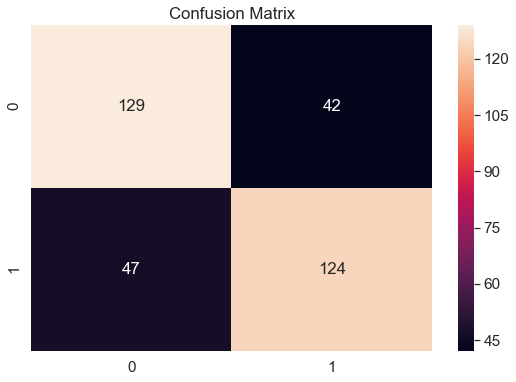

In [19]:
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm,annot=True,fmt="d")